In [1]:
from pathlib import Path
import potentials

import matplotlib.pyplot as plt

In [1]:
import atomman as am

In [6]:
import numpy as np

In [2]:
ucell = am.load('prototype', 'A1--Cu--fcc')

In [18]:
system = ucell.supersize((-15, 15), (-15, 15), (-15, 15))

In [19]:
v, counts = np.unique(system.dmag([[0.0,0.0,0.0]], range(system.natoms)), return_counts=True)
v2 = []
counts2 = []

for val, count in zip(v, counts):
    if len(v2) == 0:
        v2.append(val)
        counts2.append(count)
    else:
        if np.isclose(v2[-1], val):
            counts2[-1] += count
        else:
            v2.append(val)
            counts2.append(count)

In [20]:
for val, count in zip(v2[1:], counts2[1:]):
    if val > 6.0001:
        break
    print(f'{count:3} {val}')

 12 0.7071067811865476
  6 1.0
 24 1.224744871391589
 12 1.4142135623730951
 24 1.5811388300841898
  8 1.7320508075688772
 48 1.8708286933869707
  6 2.0
 36 2.1213203435596424
 24 2.23606797749979
 24 2.345207879911715
 24 2.449489742783178
 72 2.5495097567963922
 48 2.7386127875258306
 12 2.8284271247461903
 48 2.9154759474226504
 30 3.0
 72 3.082207001484488
 24 3.1622776601683795
 48 3.24037034920393
 24 3.3166247903554
 48 3.391164991562634
  8 3.4641016151377544
 84 3.5355339059327378
 24 3.605551275463989
 96 3.6742346141747673
 48 3.7416573867739413
 24 3.8078865529319543
 96 3.9370039370059056
  6 4.0
 96 4.06201920231798
 48 4.123105625617661
 48 4.183300132670378
 36 4.242640687119285
120 4.301162633521313
 24 4.358898943540674
 48 4.415880433163924
 24 4.47213595499958
 48 4.527692569068709
 48 4.58257569495584
120 4.636809247747852
 24 4.69041575982343
120 4.743416490252569
 96 4.847679857416329
 24 4.898979485566356
108 4.949747468305833
 30 5.0
 48 5.049752469181039
 72 5

In [2]:
alloy = potentials.eam.EAMAlloy(filename='C:/Users/lmh1/Documents/library/potential_LAMMPS/2013--Bonny-G--Fe-Cr-W--LAMMPS--ipr3/FeCrW_d.eam.alloy')

60012


In [3]:
fs = potentials.eam.EAMFS(filename='C:/Users/lmh1/Documents/library/potential_LAMMPS/2013--Bonny-G--Fe-Cr-W--LAMMPS--ipr3/FeCrW_s.eam.fs')

450012


In [5]:
len(alloy.symbols) * 4

12

In [11]:
numsymbols = len(fs.symbols)
numsets = sum(range(1, numsymbols+1))

In [12]:
numsymbols * (4 + fs.numrho) + numsymbols**2 * fs.numr + numsets * fs.numr

450012

In [11]:
fs.print_overview()

sym at#  mass      alat       lat
Fe   1  55.845    2.85532463 bcc
Cr  24  51.996    2.86600724 bcc
W   74  183.85    3.16520001 bcc

rho: [0.00000e+00 4.00000e-05 8.00000e-05 ... 4.99988e+00 4.99992e+00
 4.99996e+00]
r: [0.00000e+00 1.06000e-03 2.12000e-03 ... 5.29682e+00 5.29788e+00
 5.29894e+00]

F(rho):
Fe [ 0.00000000e+00 -1.37248976e-03 -1.94099203e-03 ...  9.21435607e+00
  9.21450933e+00  9.21466259e+00]
Cr [ 0.00000000e+00 -6.18255739e-05 -8.74330154e-05 ...  9.34194453e+00
  9.34209427e+00  9.34224401e+00]
W [0. 0. 0. ... 0. 0. 0.]

rho(r):
Fe Fe [0. 0. 0. ... 0. 0. 0.]
Fe Cr [0.00000000e+00 1.43506109e-16 9.13584038e-15 ... 4.40532774e-09
 1.95013838e-09 4.85573512e-10]
Fe W [0. 0. 0. ... 0. 0. 0.]
Cr Fe [0.00000000e+00 1.43506109e-16 9.13584038e-15 ... 4.40532774e-09
 1.95013838e-09 4.85573512e-10]
Cr Cr [0. 0. 0. ... 0. 0. 0.]
Cr W [0. 0. 0. ... 0. 0. 0.]
W Fe [0. 0. 0. ... 0. 0. 0.]
W Cr [0. 0. 0. ... 0. 0. 0.]
W W [0. 0. 0. ... 0. 0. 0.]

r*phi(r):
Fe Fe [0. 0. 0. ... 0. 

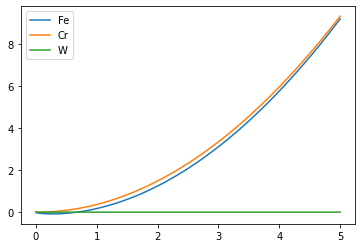

In [13]:
for symbol in fs.symbols:
    plt.plot(fs.rho, fs.F_rho(symbol), label=symbol)
plt.legend()

In [14]:
fs.set_r(num=10000, cutoff=fs.cutoffr)

In [15]:
fs.cutoffrho

4.999960000000001

In [17]:
fs.set_rho(num=10000, cutoff=fs.cutoffrho)

In [18]:
fs.print_overview()

sym at#  mass      alat       lat
Fe   1  55.845    2.85532463 bcc
Cr  24  51.996    2.86600724 bcc
W   74  183.85    3.16520001 bcc

rho: [0.00000000e+00 5.00046005e-04 1.00009201e-03 ... 4.99895991e+00
 4.99945995e+00 4.99996000e+00]
r: [0.00000000e+00 5.30053005e-04 1.06010601e-03 ... 5.29893989e+00
 5.29946995e+00 5.30000000e+00]

F(rho):
Fe [ 0.00000000e+00 -4.85261296e-03 -6.86237954e-03 ...  9.21083116e+00
  9.21274677e+00  9.21466259e+00]
Cr [ 0.00000000e+00 -2.18504949e-04 -3.08770448e-04 ...  9.33850055e+00
  9.34037219e+00  9.34224401e+00]
W [0. 0. 0. ... 0. 0. 0.]

rho(r):
Fe Fe [0. 0. 0. ... 0. 0. 0.]
Fe Cr [0.00000000e+00 1.49481502e-15 1.43288459e-16 ... 4.85670835e-10
 1.21208682e-10 1.42470393e-13]
Fe W [0. 0. 0. ... 0. 0. 0.]
Cr Fe [0.00000000e+00 1.49481502e-15 1.43288459e-16 ... 4.85670835e-10
 1.21208682e-10 1.42470393e-13]
Cr Cr [0. 0. 0. ... 0. 0. 0.]
Cr W [0. 0. 0. ... 0. 0. 0.]
W Fe [0. 0. 0. ... 0. 0. 0.]
W Cr [0. 0. 0. ... 0. 0. 0.]
W W [0. 0. 0. ... 0. 0. 0.

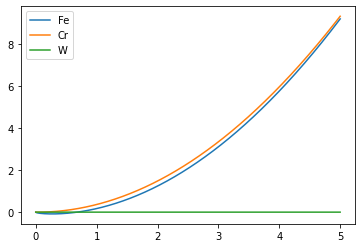

In [19]:
for symbol in fs.symbols:
    plt.plot(fs.rho, fs.F_rho(symbol), label=symbol)
plt.legend()

In [7]:
rphi_r = alloy.rphi_r(['W', 'Cr'])
rphi_r[abs(rphi_r) < 1e-100] = 0.0


array([ 0.        , -0.03518989, -0.07025168, ...,  0.        ,
        0.        ,  0.        ])

In [5]:
alloy.cutoffr

5.3

In [4]:
fs.print_overview()

NameError: name 'fs' is not defined

In [24]:

print('sym at#  mass      alat       lat')
for symbol in alloy.symbols:
    
    print('{:3} {:3} {:7} {:13} {:3}'.format(*alloy.symbol_info(symbol).values()))

sym at#  mass      alat       lat
Fe    1  55.845    2.85532463 bcc
Cr   24  51.996    2.86600724 bcc
W    74  183.85    3.16520001 bcc


In [16]:
for symbol1 in eam.symbols:
    for symbol2 in eam.symbols:
        print(symbol1, symbol2)
        print(eam.rho_r([symbol1, symbol2]))

Fe Fe
[0. 0. 0. ... 0. 0. 0.]
Fe Cr
[0.00000000e+00 1.43506109e-16 9.13584038e-15 ... 4.40532774e-09
 1.95013838e-09 4.85573512e-10]
Fe W
[0. 0. 0. ... 0. 0. 0.]
Cr Fe
[0.00000000e+00 1.43506109e-16 9.13584038e-15 ... 4.40532774e-09
 1.95013838e-09 4.85573512e-10]
Cr Cr
[0. 0. 0. ... 0. 0. 0.]
Cr W
[0. 0. 0. ... 0. 0. 0.]
W Fe
[0. 0. 0. ... 0. 0. 0.]
W Cr
[0. 0. 0. ... 0. 0. 0.]
W W
[0. 0. 0. ... 0. 0. 0.]


In [16]:
for symbol1 in eam.symbols:
    for symbol2 in eam.symbols:
        print(symbol1, symbol2)
        print(eam.rho_r([symbol1, symbol2]))

Fe Fe
[0. 0. 0. ... 0. 0. 0.]
Fe Cr
[0.00000000e+00 1.43506109e-16 9.13584038e-15 ... 4.40532774e-09
 1.95013838e-09 4.85573512e-10]
Fe W
[0. 0. 0. ... 0. 0. 0.]
Cr Fe
[0.00000000e+00 1.43506109e-16 9.13584038e-15 ... 4.40532774e-09
 1.95013838e-09 4.85573512e-10]
Cr Cr
[0. 0. 0. ... 0. 0. 0.]
Cr W
[0. 0. 0. ... 0. 0. 0.]
W Fe
[0. 0. 0. ... 0. 0. 0.]
W Cr
[0. 0. 0. ... 0. 0. 0.]
W W
[0. 0. 0. ... 0. 0. 0.]


In [14]:
eam.rho_r(['Cr', 'Fe'])

array([0.00000000e+00, 1.43506109e-16, 9.13584038e-15, ...,
       4.40532774e-09, 1.95013838e-09, 4.85573512e-10])

In [15]:
eam.rho_r(['Fe', 'Cr'])

array([0.00000000e+00, 1.43506109e-16, 9.13584038e-15, ...,
       4.40532774e-09, 1.95013838e-09, 4.85573512e-10])

In [14]:
eam.rho_r('Cr')

array([1.00000000e+08, 2.19421999e+04, 1.09477945e+04, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [15]:
eam.rho_r('W')

array([0.46584875, 0.46562433, 0.46539997, ..., 0.        , 0.        ,
       0.        ])

In [69]:
np.exp(0)

1.0

In [13]:
eam.densityvalues(['Fe'])

array([7.4497628 , 7.44064414, 7.43153317, ..., 0.        , 0.        ,
       0.        ])

In [32]:
eam.densityvalues('Cr')

array([1.00000000e+08, 2.19421999e+04, 1.09477945e+04, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [15]:
eam.densityvalues('W')

array([0.46584875, 0.46562433, 0.46539997, ..., 0.        , 0.        ,
       0.        ])

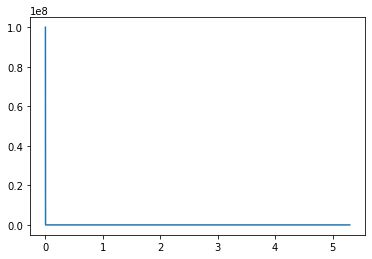

In [31]:
plt.plot(eam.rvalues(), eam.densityvalues('Cr'))

In [17]:
eam.embedvalues('Fe')

array([ 0.        , -0.15916477, -0.22330402, ..., -2.32022144,
       -2.32076307, -2.32130507])

In [18]:
eam.embedvalues('Cr')

array([-4.35346100e-04, -5.54265031e-02, -1.07179083e-01, ...,
        1.66104572e+01,  1.66169194e+01,  1.66233816e+01])

In [19]:
eam.embedvalues('W')

array([ 0.        , -0.37955412, -0.53263578, ...,  7.94212946,
        7.94645356,  7.95077793])

- - -

In [100]:
number = eam.pairvalues(['Fe', 'Fe'])[1]

numstr = f'{number:18.11E}'
numstr

'-5.22279881971E+02'

In [132]:
fortranFormat(number / 1000)

'-0.522279881971E+00'

In [126]:
eindex = numstr.find('E')

sign = numstr[0]
coeff = f'{sign}0.{numstr[1]}{numstr[3:eindex]}'

expstr = numstr[eindex+1:]
exp = abs(int(expstr)*1+1)
#print(coeff)

print(f'{coeff}E{exp:+03d}')



-0.522279881971E+03


In [113]:
'-0.522279881971E+03'

'-0.522279881971E+03'

In [92]:
numstr.find('a')

-1

In [7]:
def fortranFormat(number):
    numstr = f'{number:18.11E}'
    
    # Extract sign and locate E
    sign = numstr[0]
    eindex = numstr.find('E')
    
    # Build coefficient starting with 0
    coeff = f'0.{numstr[1]}{numstr[3:eindex]}'

    # Extract exp and increase by 1
    expstr = numstr[eindex+1:]
    exp = int(expstr)*1+1

    return f'{sign}{coeff}E{exp:+03d}'

In [8]:
print(fortranFormat(eam.pairvalues(['Fe', 'Fe'])[1]))
print(fortranFormat(2 * eam.pairvalues(['Fe', 'Fe'])[1] - eam.pairvalues(['Fe', 'Fe'])[2]))

-0.522279881971E+03
-0.524688552679E+03


In [135]:
s = 27.8689586
h = 0.25
rcut = 4.0
K = 18.8275098

x = (0 - rcut) / h

ϕ = s * x**4 / (1 + x**4)
v = -ϕ * K
print(fortranFormat(v))

-0.524695084946E+03


In [ ]:
 0.000000000000E+00
-5.246950849457E+02

- - -

In [136]:
print(fortranFormat(eam.pairvalues(['Fe', 'Ni'])[1]))
print(fortranFormat(2 * eam.pairvalues(['Fe', 'Ni'])[1] - eam.pairvalues(['Fe', 'Ni'])[2]))

 0.679350139289E+00
 0.220299124800E-02


In [137]:
s = 27.8689586
h = 0.25
rcut = 4.0
K = 0

x = (0 - rcut) / h

ϕ = s * x**4 / (1 + x**4)
v = -ϕ * K
print(fortranFormat(v))

-0.000000000000E+01


- - -

In [138]:
print(fortranFormat(eam.pairvalues(['Fe', 'Cr'])[1]))
print(fortranFormat(2 * eam.pairvalues(['Fe', 'Cr'])[1] - eam.pairvalues(['Fe', 'Cr'])[2]))

-0.329986028250E+03
-0.331766597362E+03


In [73]:
s = 27.8689586
h = 0.25
rcut = 4.0
K = 18.8275098

x = (0 - rcut) / h

ϕ = s * x**4 / (1 + x**4)
-ϕ * K

524.695084945671

- - -

In [139]:
print(fortranFormat(eam.pairvalues(['Ni', 'Ni'])[1]))
print(fortranFormat(2 * eam.pairvalues(['Ni', 'Ni'])[1] - eam.pairvalues(['Ni', 'Ni'])[2]))

-0.329986028250E+03
-0.331766597362E+03


In [140]:
s = 27.8750306
h = 0.25
rcut = 5.6
K = 11.9021555

x = (0 - rcut) / h

ϕ = s * x**4 / (1 + x**4)
v = -ϕ * K
print(fortranFormat(v))

-0.331771630976E+03


- - -

In [79]:
2 * eam.pairvalues(['Ni', 'Cr'])[1] - eam.pairvalues(['Ni', 'Cr'])[2]

0.0022221176760000017

In [73]:
s = 27.8689586
h = 0.25
rcut = 4.0
K = 18.8275098

x = (0 - rcut) / h

ϕ = s * x**4 / (1 + x**4)
-ϕ * K

524.695084945671

- - -

In [141]:
print(fortranFormat(eam.pairvalues(['Cr', 'Cr'])[1]))
print(fortranFormat(2 * eam.pairvalues(['Cr', 'Cr'])[1] - eam.pairvalues(['Cr', 'Cr'])[2]))

-0.140391717701E+03
-0.141694675267E+03


In [142]:
s = 31.2613817
h = 0.25
rcut = 5.6
K = 4.53272297

x = (0 - rcut) / h

ϕ = s * x**4 / (1 + x**4)
v = -ϕ * K
print(fortranFormat(v))

-0.141698620080E+03


- - -

In [20]:
eam.pairvalues(['Fe', 'Fe'])

array([-0.00000000e+00,  9.62656473e+03,  9.52060181e+03, ...,
       -1.19734907e-09, -3.54841092e-10, -4.43640110e-11])

In [3]:
eam.rphi_r(['Fe', 'Fe'])

array([ 0.00000000e+00,  9.62656473e+03,  9.52060181e+03, ...,
       -1.19734907e-09, -3.54841092e-10, -4.43640110e-11])

In [21]:
eam.pairvalues(['Cr', 'Fe'])

array([ 0.        ,  0.83069212,  1.65890519, ..., -0.        ,
       -0.        , -0.        ])

In [4]:
eam.rphi_r(['Cr', 'Fe'])

array([0.        , 0.83069212, 1.65890519, ..., 0.        , 0.        ,
       0.        ])

In [5]:
eam.rphi_r(['Fe', 'Cr'])

array([0.        , 0.83069212, 1.65890519, ..., 0.        , 0.        ,
       0.        ])

In [22]:
eam.pairvalues(['Fe', 'Cr'])

array([ 0.        ,  0.83069212,  1.65890519, ..., -0.        ,
       -0.        , -0.        ])

In [23]:
eam.pairvalues(['Cr', 'Cr'])

array([       nan, 1.70886415, 1.73201107, ..., 0.        , 0.        ,
       0.        ])

In [6]:
eam.rphi_r(['Cr', 'Cr'])

array([0.        , 1.70886415, 1.73201107, ..., 0.        , 0.        ,
       0.        ])

In [25]:
eam.pairvalues(['W', 'Fe'])

array([0.        , 2.41875569, 4.83006574, ..., 0.        , 0.        ,
       0.        ])

In [7]:
eam.rphi_r(['W', 'Fe'])

array([0.00000000e+000, 2.41875569e+000, 4.83006574e+000, ...,
       0.00000000e+000, 0.00000000e+000, 6.68887130e-198])

In [8]:
eam.rphi_r(['Fe', 'W'])

array([0.00000000e+000, 2.41875569e+000, 4.83006574e+000, ...,
       0.00000000e+000, 0.00000000e+000, 6.68887130e-198])

In [26]:
eam.pairvalues(['W', 'Cr'])

array([-0.        , -0.07024468, -0.13997763, ...,  0.        ,
        0.        ,  0.        ])

In [9]:
eam.rphi_r(['W', 'Cr'])

array([ 0.        , -0.07024468, -0.13997763, ...,  0.        ,
        0.        ,  0.        ])

In [10]:
eam.rphi_r(['Cr', 'W'])

array([ 0.        , -0.07024468, -0.13997763, ...,  0.        ,
        0.        ,  0.        ])

In [27]:
eam.pairvalues(['W', 'W'])

array([0.        , 3.38814413, 6.76275747, ..., 0.        , 0.        ,
       0.        ])

In [11]:
eam.rphi_r(['W', 'W'])

array([0.        , 3.38814413, 6.76275747, ..., 0.        , 0.        ,
       0.        ])

In [10]:
eam.pairvalues(['Ni', 'Cr'])

array([0.        , 0.69244991, 1.38261978, ..., 0.        , 0.        ,
       0.        ])

In [11]:
eam.pairvalues(['Cr', 'Cr'])

array([-1.41698620e+02, -1.40391718e+02, -1.39088760e+02, ...,
        2.40052812e-08,  7.12041744e-09,  8.91016349e-10])

In [20]:
eam.pairvalues(['Cr', 'Cr'])

array([-1.41698620e+02, -1.40391718e+02, -1.39088760e+02, ...,
        2.40052812e-08,  7.12041744e-09,  8.91016349e-10])

In [32]:
allsymbols = ['Fe', 'Ni', 'Cr']
symbols = ['Cr', 'Ni']

j = allsymbols.index(symbols[0])
k = allsymbols.index(symbols[1])


i = sum(range(j+1)) + k
i

1 1


In [41]:
for j in range(3):
    for k in range(3):
        if j >= k:
            i = sum(range(j+1)) + k
        else:
            i = sum(range(k+1)) + j
        print(j+1, k+1, '=', i)

1 1 = 0
1 2 = 1
1 3 = 3
2 1 = 1
2 2 = 2
2 3 = 4
3 1 = 3
3 2 = 4
3 3 = 5


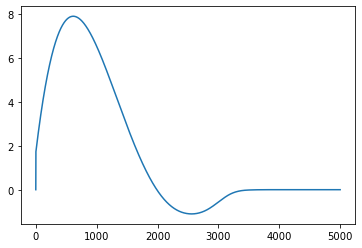

In [29]:
phi = eam.pairvalues(['Cr', 'Cr'])
phi[0] = 0
plt.plot(eam.pairvalues(['Cr', 'Cr']))